In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

sns.set_theme(style="darkgrid")
current_palette=sns.color_palette()

In [2]:
pd.options.display.min_rows = 20
pd.options.display.max_columns = 50

### Load in the csv data from filesystem

In [4]:
## Read in 2022 data from filesystem
df_flights_2022 = pd.read_csv("../../data/eda/flights/flight_data_Y2022/flight_data_2022.csv.zip",  low_memory=False)

In [5]:
df_flights_2022.head()

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Originally_Scheduled_Code_Share_Airline,DOT_ID_Originally_Scheduled_Code_Share_Airline,IATA_Code_Originally_Scheduled_Code_Share_Airline,Flight_Num_Originally_Scheduled_Code_Share_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,...,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Duplicate,Unnamed: 119
0,0,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,1581,NaN,NaN,NaN,NaN,DL,19790,DL,N315DN,1581,11697,1169706,32467,FLL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,1,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,1582,NaN,NaN,NaN,NaN,DL,19790,DL,N545US,1582,10397,1039707,30397,ATL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,2,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,1582,NaN,NaN,NaN,NaN,DL,19790,DL,N545US,1582,11697,1169706,32467,FLL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,3,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,1583,NaN,NaN,NaN,NaN,DL,19790,DL,N345NB,1583,11697,1169706,32467,FLL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,4,2022,1,1,6,4,2022-01-06,DL,DL,19790,DL,1584,NaN,NaN,NaN,NaN,DL,19790,DL,N978AT,1584,10397,1039707,30397,ATL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


#### Data Preparation
- Identifying missing values
- Renaming columns
- Dropping irrelevant columns
- Feature selection

Column Selection

In [6]:
df_flights_2022.columns.to_list()

['Unnamed: 0',
 'Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'FlightDate',
 'Marketing_Airline_Network',
 'Operated_or_Branded_Code_Share_Partners',
 'DOT_ID_Marketing_Airline',
 'IATA_Code_Marketing_Airline',
 'Flight_Number_Marketing_Airline',
 'Originally_Scheduled_Code_Share_Airline',
 'DOT_ID_Originally_Scheduled_Code_Share_Airline',
 'IATA_Code_Originally_Scheduled_Code_Share_Airline',
 'Flight_Num_Originally_Scheduled_Code_Share_Airline',
 'Operating_Airline ',
 'DOT_ID_Operating_Airline',
 'IATA_Code_Operating_Airline',
 'Tail_Number',
 'Flight_Number_Operating_Airline',
 'OriginAirportID',
 'OriginAirportSeqID',
 'OriginCityMarketID',
 'Origin',
 'OriginCityName',
 'OriginState',
 'OriginStateFips',
 'OriginStateName',
 'OriginWac',
 'DestAirportID',
 'DestAirportSeqID',
 'DestCityMarketID',
 'Dest',
 'DestCityName',
 'DestState',
 'DestStateFips',
 'DestStateName',
 'DestWac',
 'CRSDepTime',
 'DepTime',
 'DepDelay',
 'DepDelayMinutes',
 'DepDel15',
 'DepartureD

In [7]:
##### Data cleaning - 1 ####
# remove spaces
df_flights_2022 = df_flights_2022.rename(columns={'Operating_Airline ' : 'Operating_Airline'})

In [8]:
# df_flights_2022.columns.to_list()

In [9]:
# Drop irrelevant columns
SELECTED_COLUMNS = [
    # 'Year',
    # 'Quarter',
    # 'Month',
    # 'DayofMonth',
    # 'DayOfWeek',
    'FlightDate',
    # 'Marketing_Airline_Network',
    # 'Operated_or_Branded_Code_Share_Partners',
    # 'DOT_ID_Marketing_Airline',
    # 'IATA_Code_Marketing_Airline',
    # 'Flight_Number_Marketing_Airline',
    # 'Originally_Scheduled_Code_Share_Airline',
    # 'DOT_ID_Originally_Scheduled_Code_Share_Airline',
    # 'IATA_Code_Originally_Scheduled_Code_Share_Airline',
    # 'Flight_Num_Originally_Scheduled_Code_Share_Airline',
    'Operating_Airline',
    # 'DOT_ID_Operating_Airline',
    # 'IATA_Code_Operating_Airline',
    'Tail_Number',
    'Flight_Number_Operating_Airline',
    'OriginAirportID',
    # 'OriginAirportSeqID',
    # 'OriginCityMarketID',
    'Origin',
    'OriginCityName',
    'OriginState',
    # 'OriginStateFips',
    # 'OriginStateName',
    # 'OriginWac',
    'DestAirportID',
    # 'DestAirportSeqID',
    # 'DestCityMarketID',
    'Dest',
    'DestCityName',
    'DestState',
    # 'DestStateFips',
    'DestStateName',
    # 'DestWac',
    'CRSDepTime',
    'DepTime',
    'DepDelay',
    'DepDelayMinutes',
    'DepDel15',
    'DepartureDelayGroups',
    'DepTimeBlk',
    'TaxiOut',
    'WheelsOff',
    'WheelsOn',
    'TaxiIn',
    'CRSArrTime',
    'ArrTime',
    'ArrDelay',
    'ArrDelayMinutes',
    'ArrDel15',
    'ArrivalDelayGroups',
    'ArrTimeBlk',
    'Cancelled',
    'CancellationCode',
    'Diverted',
    'CRSElapsedTime',
    'ActualElapsedTime',
    'AirTime',
    'Flights',
    'Distance',
    'DistanceGroup',
    'CarrierDelay',
    'WeatherDelay',
    'NASDelay',
    'SecurityDelay',
    'LateAircraftDelay',
    'FirstDepTime',
    'TotalAddGTime',
    'LongestAddGTime',
    # 'DivAirportLandings',
    # 'DivReachedDest',
    # 'DivActualElapsedTime',
    # 'DivArrDelay',
    # 'DivDistance',
    # 'Div1Airport',
    # 'Div1AirportID',
    # 'Div1AirportSeqID',
    # 'Div1WheelsOn',
    # 'Div1TotalGTime',
    # 'Div1LongestGTime',
    # 'Div1WheelsOff',
    # 'Div1TailNum',
    # 'Div2Airport',
    # 'Div2AirportID',
    # 'Div2AirportSeqID',
    # 'Div2WheelsOn',
    # 'Div2TotalGTime',
    # 'Div2LongestGTime',
    # 'Div2WheelsOff',
    # 'Div2TailNum',
    # 'Div3Airport',
    # 'Div3AirportID',
    # 'Div3AirportSeqID',
    # 'Div3WheelsOn',
    # 'Div3TotalGTime',
    # 'Div3LongestGTime',
    # 'Div3WheelsOff',
    # 'Div3TailNum',
    # 'Div4Airport',
    # 'Div4AirportID',
    # 'Div4AirportSeqID',
    # 'Div4WheelsOn',
    # 'Div4TotalGTime',
    # 'Div4LongestGTime',
    # 'Div4WheelsOff',
    # 'Div4TailNum',
    # 'Div5Airport',
    # 'Div5AirportID',
    # 'Div5AirportSeqID',
    # 'Div5WheelsOn',
    # 'Div5TotalGTime',
    # 'Div5LongestGTime',
    # 'Div5WheelsOff',
    # 'Div5TailNum',
    # 'Duplicate',
    # 'Unnamed: 119'
]

In [10]:
SELECTED_COLUMNS

['FlightDate',
 'Operating_Airline',
 'Tail_Number',
 'Flight_Number_Operating_Airline',
 'OriginAirportID',
 'Origin',
 'OriginCityName',
 'OriginState',
 'DestAirportID',
 'Dest',
 'DestCityName',
 'DestState',
 'DestStateName',
 'CRSDepTime',
 'DepTime',
 'DepDelay',
 'DepDelayMinutes',
 'DepDel15',
 'DepartureDelayGroups',
 'DepTimeBlk',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'CRSArrTime',
 'ArrTime',
 'ArrDelay',
 'ArrDelayMinutes',
 'ArrDel15',
 'ArrivalDelayGroups',
 'ArrTimeBlk',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'AirTime',
 'Flights',
 'Distance',
 'DistanceGroup',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',
 'FirstDepTime',
 'TotalAddGTime',
 'LongestAddGTime']

In [11]:
df_flights_2022 = df_flights_2022[SELECTED_COLUMNS].copy()
df_flights_2022.shape


(4691967, 48)

In [12]:
# df_flights_2022.columns.to_list()

### Enhance Memory Usage
- Casting DataTypes

In [13]:
#understanding memory usage
df_flights_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4691967 entries, 0 to 4691966
Data columns (total 48 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   FlightDate                       object 
 1   Operating_Airline                object 
 2   Tail_Number                      object 
 3   Flight_Number_Operating_Airline  int64  
 4   OriginAirportID                  int64  
 5   Origin                           object 
 6   OriginCityName                   object 
 7   OriginState                      object 
 8   DestAirportID                    int64  
 9   Dest                             object 
 10  DestCityName                     object 
 11  DestState                        object 
 12  DestStateName                    object 
 13  CRSDepTime                       int64  
 14  DepTime                          float64
 15  DepDelay                         float64
 16  DepDelayMinutes                  float64
 17  DepDel15

Types

In [14]:
## Types -> Getting the right types will enable analysis and correctness
df_flights_2022.dtypes

FlightDate                          object
Operating_Airline                   object
Tail_Number                         object
Flight_Number_Operating_Airline      int64
OriginAirportID                      int64
Origin                              object
OriginCityName                      object
OriginState                         object
DestAirportID                        int64
Dest                                object
DestCityName                        object
DestState                           object
DestStateName                       object
CRSDepTime                           int64
DepTime                            float64
DepDelay                           float64
DepDelayMinutes                    float64
DepDel15                           float64
DepartureDelayGroups               float64
DepTimeBlk                          object
TaxiOut                            float64
WheelsOff                          float64
WheelsOn                           float64
TaxiIn     

In [15]:
## Evaluate memory usage
df_flights_2022.memory_usage(deep=True)

Index                                    128
FlightDate                         314361789
Operating_Airline                  276826053
Tail_Number                        294596228
Flight_Number_Operating_Airline     37535736
OriginAirportID                     37535736
Origin                             281518020
OriginCityName                     328758959
OriginState                        276826053
DestAirportID                       37535736
Dest                               281518020
DestCityName                       328758751
DestState                          276826053
DestStateName                      305896341
CRSDepTime                          37535736
DepTime                             37535736
DepDelay                            37535736
DepDelayMinutes                     37535736
DepDel15                            37535736
DepartureDelayGroups                37535736
DepTimeBlk                         309669822
TaxiOut                             37535736
WheelsOff 

In [16]:
mem_usage_initial = df_flights_2022[SELECTED_COLUMNS].memory_usage(deep=True).sum()
mem_usage_initial

5052725293

1. Category types 

In [17]:
# convert string names to category type to save some space

category_cols = ["Operating_Airline","Origin","Dest", "DestState", "OriginState", "OriginCityName", "DestStateName",  "DestCityName"]

for col in category_cols:
    df_flights_2022[col]= df_flights_2022[col].astype("category")


2. Handling missing values in floats

In [18]:
(df_flights_2022.select_dtypes('float'))

,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,173.0,NaN,NaN,1.0,1076.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1627.0,-4.0,0.0,0.0,-1.0,15.0,1642.0,1815.0,5.0,1820.0,-1.0,0.0,0.0,-1.0,0.0,0.0,110.0,113.0,93.0,1.0,581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1929.0,-2.0,0.0,0.0,-1.0,13.0,1942.0,2105.0,10.0,2115.0,-12.0,0.0,0.0,-1.0,0.0,0.0,116.0,106.0,83.0,1.0,581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1019.0,-5.0,0.0,0.0,-1.0,17.0,1036.0,1209.0,3.0,1212.0,-15.0,0.0,0.0,-1.0,0.0,0.0,123.0,113.0,93.0,1.0,680.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1113.0,-4.0,0.0,0.0,-1.0,14.0,1127.0,1127.0,4.0,1131.0,-11.0,0.0,0.0,-1.0,0.0,0.0,85.0,78.0,60.0,1.0,341.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1230.0,-7.0,0.0,0.0,-1.0,11.0,1241.0,1430.0,5.0,1435.0,-23.0,0.0,0.0,-2.0,0.0,0.0,81.0,65.0,49.0,1.0,341.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,857.0,-3.0,0.0,0.0,-1.0,13.0,910.0,1030.0,8.0,1038.0,-12.0,0.0,0.0,-1.0,0.0,0.0,110.0,101.0,80.0,1.0,481.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1018.0,18.0,18.0,1.0,1.0,15.0,1033.0,1431.0,4.0,1435.0,2.0,2.0,0.0,0.0,0.0,0.0,213.0,197.0,178.0,1.0,1416.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1422.0,8.0,8.0,0.0,0.0,11.0,1433.0,1528.0,3.0,1531.0,-2.0,0.0,0.0,-1.0,0.0,0.0,79.0,69.0,55.0,1.0,356.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1640.0,-3.0,0.0,0.0,-1.0,12.0,1652.0,1759.0,4.0,1803.0,-11.0,0.0,0.0,-1.0,0.0,0.0,91.0,83.0,67.0,1.0,356.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
## lets start with analysing DepTime
(df_flights_2022.DepTime.describe())

count    4.556687e+06
mean     1.334551e+03
std      5.068218e+02
min      1.000000e+00
25%      9.160000e+02
50%      1.324000e+03
75%      1.745000e+03
max      2.400000e+03
Name: DepTime, dtype: float64

In [20]:
#oops! 135280 missing values [NaN: 135280]
(df_flights_2022.DepTime.value_counts(dropna=False))

NaN      135280
555.0     12168
556.0     11320
557.0     11308
558.0     10612
559.0     10081
655.0      9483
600.0      9451
554.0      9344
656.0      8862
          ...  
421.0         9
400.0         8
346.0         8
423.0         8
422.0         7
425.0         7
353.0         5
403.0         5
428.0         4
441.0         2
Name: DepTime, Length: 1441, dtype: int64

In [21]:
# investigate where these values are missing
(df_flights_2022.query('DepTime.isna()'))

,FlightDate,Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,Origin,OriginCityName,OriginState,DestAirportID,Dest,DestCityName,DestState,DestStateName,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime
0,2022-01-06,DL,N315DN,1581,11697,FLL,"Fort Lauderdale, FL",FL,12953,LGA,"New York, NY",NY,New York,1126,NaN,NaN,NaN,NaN,NaN,1100-1159,NaN,NaN,NaN,NaN,1419,NaN,NaN,NaN,NaN,NaN,1400-1459,1.0,A,0.0,173.0,NaN,NaN,1.0,1076.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,2022-01-06,DL,N998AT,1605,11433,DTW,"Detroit, MI",MI,10693,BNA,"Nashville, TN",TN,Tennessee,2120,NaN,NaN,NaN,NaN,NaN,2100-2159,NaN,NaN,NaN,NaN,2216,NaN,NaN,NaN,NaN,NaN,2200-2259,1.0,B,0.0,116.0,NaN,NaN,1.0,456.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,2022-01-06,DL,N128DU,1650,11193,CVG,"Cincinnati, OH",KY,10721,BOS,"Boston, MA",MA,Massachusetts,1700,NaN,NaN,NaN,NaN,NaN,1700-1759,NaN,NaN,NaN,NaN,1903,NaN,NaN,NaN,NaN,NaN,1900-1959,1.0,B,0.0,123.0,NaN,NaN,1.0,752.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,2022-01-06,DL,N315DN,1722,13303,MIA,"Miami, FL",FL,12953,LGA,"New York, NY",NY,New York,1958,NaN,NaN,NaN,NaN,NaN,1900-1959,NaN,NaN,NaN,NaN,2307,NaN,NaN,NaN,NaN,NaN,2300-2359,1.0,B,0.0,189.0,NaN,NaN,1.0,1096.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157,2022-01-06,DL,N831DN,1729,10397,ATL,"Atlanta, GA",GA,10693,BNA,"Nashville, TN",TN,Tennessee,1640,NaN,NaN,NaN,NaN,NaN,1600-1659,NaN,NaN,NaN,NaN,1646,NaN,NaN,NaN,NaN,NaN,1600-1659,1.0,B,0.0,66.0,NaN,NaN,1.0,214.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,2022-01-06,DL,N831DN,1729,10693,BNA,"Nashville, TN",TN,10397,ATL,"Atlanta, GA",GA,Georgia,1756,NaN,NaN,NaN,NaN,NaN,1700-1759,NaN,NaN,NaN,NaN,2010,NaN,NaN,NaN,NaN,NaN,2000-2059,1.0,B,0.0,74.0,NaN,NaN,1.0,214.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,2022-01-06,DL,N3748Y,2060,11618,EWR,"Newark, NJ",NJ,10397,ATL,"Atlanta, GA",GA,Georgia,600,NaN,NaN,NaN,NaN,NaN,0600-0659,NaN,NaN,NaN,NaN,829,NaN,NaN,NaN,NaN,NaN,0800-0859,1.0,A,0.0,149.0,NaN,NaN,1.0,746.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,2022-01-06,DL,N378DA,2097,15304,TPA,"Tampa, FL",FL,12953,LGA,"New York, NY",NY,New York,1815,NaN,NaN,NaN,NaN,NaN,1800-1859,NaN,NaN,NaN,NaN,2053,NaN,NaN,NaN,NaN,NaN,2000-2059,1.0,B,0.0,158.0,NaN,NaN,1.0,1010.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,2022-01-06,DL,N111NG,2114,14683,SAT,"San Antonio, TX",TX,11433,DTW,"Detroit, MI",MI,Michigan,531,NaN,NaN,NaN,NaN,NaN,0001-0559,NaN,NaN,NaN,NaN,930,NaN,NaN,NaN,NaN,NaN,0900-0959,1.0,A,0.0,179.0,NaN,NaN,1.0,1214.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
378,2022-01-06,DL,N335DN,2238,13303,MIA,"Miami, FL",FL,12478,JFK,"New York, NY",NY,New York,1959,NaN,NaN,NaN,NaN,NaN,1900-1959,NaN,NaN,NaN,NaN,2302,NaN,NaN,NaN,NaN,NaN,2300-2359,1.0,B,0.0,183.0,NaN,NaN,1.0,1089.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
(df_flights_2022.DepTime.describe())

count    4.556687e+06
mean     1.334551e+03
std      5.068218e+02
min      1.000000e+00
25%      9.160000e+02
50%      1.324000e+03
75%      1.745000e+03
max      2.400000e+03
Name: DepTime, dtype: float64

In [23]:
np.finfo(np.float16)

finfo(resolution=0.001, min=-6.55040e+04, max=6.55040e+04, dtype=float16)

In [24]:
(df_flights_2022.DepDelayMinutes.describe())

count    4.556622e+06
mean     1.612610e+01
std      5.259895e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.100000e+01
max      7.223000e+03
Name: DepDelayMinutes, dtype: float64

In [25]:
(df_flights_2022.describe())

,Flight_Number_Operating_Airline,OriginAirportID,DestAirportID,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime
count,4.691967e+06,4.691967e+06,4.691967e+06,4.691967e+06,4.556687e+06,4.556622e+06,4.556622e+06,4.556622e+06,4.556622e+06,4.553869e+06,4.553869e+06,4.552109e+06,4.552109e+06,4.691967e+06,4.552112e+06,4.541200e+06,4.541200e+06,4.541200e+06,4.541200e+06,4.691967e+06,4.691967e+06,4.691967e+06,4.541200e+06,4.541200e+06,4691967.0,4.691967e+06,4.691967e+06,986503.000000,986503.000000,986503.000000,986503.000000,986503.000000,30419.000000,30416.000000,30416.000000
mean,2.555490e+03,1.265936e+04,1.265932e+04,1.330279e+03,1.334551e+03,1.319795e+01,1.612610e+01,2.196535e-01,2.202250e-01,1.695589e+01,1.356489e+03,1.453363e+03,7.909943e+00,1.485272e+03,1.456187e+03,7.666719e+00,1.587795e+01,2.172340e-01,-5.531622e-02,2.955583e-02,2.577171e-03,1.410956e+02,1.356888e+02,1.108371e+02,1.0,7.977327e+02,3.662583e+00,27.017608,3.873223,11.631153,0.147646,25.640915,1357.596601,41.937171,41.045075
std,1.738737e+03,1.523274e+03,1.523281e+03,4.912575e+02,5.068218e+02,5.360613e+01,5.259895e+01,4.140119e-01,2.354459e+00,9.502207e+00,5.089476e+02,5.395375e+02,6.694376e+00,5.196737e+02,5.448602e+02,5.549127e+01,5.225348e+01,4.123632e-01,2.494604e+00,1.693585e-01,5.070039e-02,7.181163e+01,7.188789e+01,6.992369e+01,0.0,5.925771e+02,2.325003e+00,75.206914,30.608661,30.408630,4.005102,55.000097,501.457956,38.339575,36.692718
min,1.000000e+00,1.013500e+04,1.013500e+04,1.000000e+00,1.000000e+00,-7.800000e+01,0.000000e+00,0.000000e+00,-2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+02,0.000000e+00,0.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,-4.800000e+01,1.400000e+01,8.000000e+00,1.0,3.100000e+01,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1.107000e+03,1.129200e+04,1.129200e+04,9.130000e+02,9.160000e+02,-5.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,1.100000e+01,9.310000e+02,1.042000e+03,4.000000e+00,1.101000e+03,1.044000e+03,-1.400000e+01,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,8.900000e+01,8.300000e+01,6.000000e+01,1.0,3.660000e+02,2.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,922.000000,17.000000,17.000000
50%,2.229000e+03,1.288900e+04,1.288900e+04,1.320000e+03,1.324000e+03,-2.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,1.500000e+01,1.338000e+03,1.455000e+03,6.000000e+00,1.512000e+03,1.458000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,1.240000e+02,1.180000e+02,9.300000e+01,1.0,6.420000e+02,3.000000e+00,7.000000,0.000000,0.000000,0.000000,0.000000,1412.000000,30.000000,30.000000
75%,3.857000e+03,1.402700e+04,1.402700e+04,1.735000e+03,1.745000e+03,1.100000e+01,1.100000e+01,0.000000e+00,0.000000e+00,1.900000e+01,1.759000e+03,1.909000e+03,9.000000e+00,1.920000e+03,1.914000e+03,1.000000e+01,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.710000e+02,1.670000e+02,1.400000e+02,1.0,1.034000e+03,5.000000e+00,26.000000,0.000000,15.000000,0.000000,30.000000,1744.000000,51.000000,50.000000
max,9.680000e+03,1.686900e+04,1.686900e+04,2.359000e+03,2.400000e+03,7.223000e+03,7.223000e+03,1.000000e+00,1.200000e+01,2.210000e+02,2.400000e+03,2.400000e+03,2.900000e+02,2.400000e+03,2.400000e+03,7.232000e+03,7.232000e+03,1.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,6.900000e+02,7.640000e+02,7.270000e+02,1.0,5.095000e+03,1.100000e+01,7232.000000,2363.000000,1740.000000,1245.000000,2098.000000,2400.000000,376.000000,341.000000


In [26]:
# Subject Matter Expert info => Missing values correspond to cancelled flights
# decision -> replace with 0
df_flights_2022 = (df_flights_2022
 .assign(DepTime=df_flights_2022.DepTime.fillna(0).astype('float16'),
         DepDelay=df_flights_2022.DepDelay.fillna(0).astype('float16'),
         DepDelayMinutes=df_flights_2022.DepDelayMinutes.fillna(0).astype('float16'),
         DepDel15=df_flights_2022.DepDel15.fillna(0).astype('float16'),
         DepartureDelayGroups=df_flights_2022.DepartureDelayGroups.fillna(0).astype('float16'),
         TaxiOut=df_flights_2022.TaxiOut.fillna(0).astype('float16'),
         WheelsOff=df_flights_2022.WheelsOff.fillna(0).astype('float16'),
         WheelsOn=df_flights_2022.WheelsOn.fillna(0).astype('float16'),
         TaxiIn=df_flights_2022.TaxiIn.fillna(0).astype('float16'),
         ArrTime=df_flights_2022.ArrTime.fillna(0).astype('float16'),
         ArrDelay=df_flights_2022.ArrDelay.fillna(0).astype('float16'),
         ArrDelayMinutes=df_flights_2022.ArrDelayMinutes.fillna(0).astype('float16'),
         ArrDel15=df_flights_2022.ArrDel15.fillna(0).astype('float16'),
         ArrivalDelayGroups=df_flights_2022.ArrivalDelayGroups.fillna(0).astype('float16'),
         CRSElapsedTime=df_flights_2022.CRSElapsedTime.fillna(0).astype('float16'),
         ActualElapsedTime=df_flights_2022.ActualElapsedTime.fillna(0).astype('float16'),
         AirTime=df_flights_2022.AirTime.fillna(0).astype('float16'),
         Flights=df_flights_2022.Flights.fillna(0).astype('float16'),
         Distance=df_flights_2022.Distance.fillna(0).astype('float16'),
         CarrierDelay=df_flights_2022.CarrierDelay.fillna(0).astype('float16'),
         WeatherDelay=df_flights_2022.WeatherDelay.fillna(0).astype('float16'),
         NASDelay=df_flights_2022.NASDelay.fillna(0).astype('float16'),
         SecurityDelay=df_flights_2022.SecurityDelay.fillna(0).astype('float16'),
         LateAircraftDelay=df_flights_2022.LateAircraftDelay.fillna(0).astype('float16'),
         FirstDepTime=df_flights_2022.FirstDepTime.fillna(0).astype('float16'),
         TotalAddGTime=df_flights_2022.TotalAddGTime.fillna(0).astype('float16'),
         LongestAddGTime=df_flights_2022.LongestAddGTime.fillna(0).astype('float16')
 ))

In [27]:
df_flights_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4691967 entries, 0 to 4691966
Data columns (total 48 columns):
 #   Column                           Dtype   
---  ------                           -----   
 0   FlightDate                       object  
 1   Operating_Airline                category
 2   Tail_Number                      object  
 3   Flight_Number_Operating_Airline  int64   
 4   OriginAirportID                  int64   
 5   Origin                           category
 6   OriginCityName                   category
 7   OriginState                      category
 8   DestAirportID                    int64   
 9   Dest                             category
 10  DestCityName                     category
 11  DestState                        category
 12  DestStateName                    category
 13  CRSDepTime                       int64   
 14  DepTime                          float16 
 15  DepDelay                         float16 
 16  DepDelayMinutes                  flo

In [28]:
df_flights_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4691967 entries, 0 to 4691966
Data columns (total 48 columns):
 #   Column                           Dtype   
---  ------                           -----   
 0   FlightDate                       object  
 1   Operating_Airline                category
 2   Tail_Number                      object  
 3   Flight_Number_Operating_Airline  int64   
 4   OriginAirportID                  int64   
 5   Origin                           category
 6   OriginCityName                   category
 7   OriginState                      category
 8   DestAirportID                    int64   
 9   Dest                             category
 10  DestCityName                     category
 11  DestState                        category
 12  DestStateName                    category
 13  CRSDepTime                       int64   
 14  DepTime                          float16 
 15  DepDelay                         float16 
 16  DepDelayMinutes                  flo

3. Format datatypes

In [29]:
##### More data cleaning ####
## Format column data from [float64] -> boolean
df_flights_2022["Cancelled"] = df_flights_2022["Cancelled"].astype("bool")
df_flights_2022["Diverted"] = df_flights_2022["Diverted"].astype("bool")
## Format column data from [object] -> boolean
df_flights_2022["FlightDate"] = pd.to_datetime(df_flights_2022["FlightDate"])

In [30]:
df_flights_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4691967 entries, 0 to 4691966
Data columns (total 48 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   FlightDate                       datetime64[ns]
 1   Operating_Airline                category      
 2   Tail_Number                      object        
 3   Flight_Number_Operating_Airline  int64         
 4   OriginAirportID                  int64         
 5   Origin                           category      
 6   OriginCityName                   category      
 7   OriginState                      category      
 8   DestAirportID                    int64         
 9   Dest                             category      
 10  DestCityName                     category      
 11  DestState                        category      
 12  DestStateName                    category      
 13  CRSDepTime                       int64         
 14  DepTime                          f

4. Int types

In [31]:
df_flights_2022.select_dtypes(int).describe()

,Flight_Number_Operating_Airline,OriginAirportID,DestAirportID,CRSDepTime,CRSArrTime,DistanceGroup
count,4.691967e+06,4.691967e+06,4.691967e+06,4.691967e+06,4.691967e+06,4.691967e+06
mean,2.555490e+03,1.265936e+04,1.265932e+04,1.330279e+03,1.485272e+03,3.662583e+00
std,1.738737e+03,1.523274e+03,1.523281e+03,4.912575e+02,5.196737e+02,2.325003e+00
min,1.000000e+00,1.013500e+04,1.013500e+04,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.107000e+03,1.129200e+04,1.129200e+04,9.130000e+02,1.101000e+03,2.000000e+00
50%,2.229000e+03,1.288900e+04,1.288900e+04,1.320000e+03,1.512000e+03,3.000000e+00
75%,3.857000e+03,1.402700e+04,1.402700e+04,1.735000e+03,1.920000e+03,5.000000e+00
max,9.680000e+03,1.686900e+04,1.686900e+04,2.359000e+03,2.400000e+03,1.100000e+01


In [32]:
np.iinfo(np.int16)

iinfo(min=-32768, max=32767, dtype=int16)

In [33]:
df_flights_2022.select_dtypes(int).dtypes

Flight_Number_Operating_Airline    int64
OriginAirportID                    int64
DestAirportID                      int64
CRSDepTime                         int64
CRSArrTime                         int64
DistanceGroup                      int64
dtype: object

In [34]:
# convert int64 to int16 type to save some space

int64_cols = ["OriginAirportID","DestAirportID","CRSDepTime", "CRSArrTime", "DistanceGroup", "Flight_Number_Operating_Airline"]

for col in int64_cols:
    df_flights_2022[col]= df_flights_2022[col].astype("int16")

In [35]:
int16_cols = ["OriginAirportID","DestAirportID","CRSDepTime", "CRSArrTime", "DistanceGroup", "Flight_Number_Operating_Airline"]
df_flights_2022[int16_cols].dtypes

OriginAirportID                    int16
DestAirportID                      int16
CRSDepTime                         int16
CRSArrTime                         int16
DistanceGroup                      int16
Flight_Number_Operating_Airline    int16
dtype: object

In [36]:
int16_cols = ["OriginAirportID","DestAirportID","CRSDepTime", "CRSArrTime", "DistanceGroup", "Flight_Number_Operating_Airline"]
df_flights_2022[int16_cols].describe()

,OriginAirportID,DestAirportID,CRSDepTime,CRSArrTime,DistanceGroup,Flight_Number_Operating_Airline
count,4.691967e+06,4.691967e+06,4.691967e+06,4.691967e+06,4.691967e+06,4.691967e+06
mean,1.265936e+04,1.265932e+04,1.330279e+03,1.485272e+03,3.662583e+00,2.555490e+03
std,1.523274e+03,1.523281e+03,4.912575e+02,5.196737e+02,2.325003e+00,1.738737e+03
min,1.013500e+04,1.013500e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.129200e+04,1.129200e+04,9.130000e+02,1.101000e+03,2.000000e+00,1.107000e+03
50%,1.288900e+04,1.288900e+04,1.320000e+03,1.512000e+03,3.000000e+00,2.229000e+03
75%,1.402700e+04,1.402700e+04,1.735000e+03,1.920000e+03,5.000000e+00,3.857000e+03
max,1.686900e+04,1.686900e+04,2.359000e+03,2.400000e+03,1.100000e+01,9.680000e+03


5. Object types

In [37]:
df_flights_2022.select_dtypes(object).head()

,Tail_Number,DepTimeBlk,ArrTimeBlk,CancellationCode
0,N315DN,1100-1159,1400-1459,A
1,N545US,1600-1659,1800-1859,NaN
2,N545US,1900-1959,2100-2159,NaN
3,N345NB,1000-1059,1200-1259,NaN
4,N978AT,1100-1159,1100-1159,NaN


In [38]:
object_cols = ["DepTimeBlk", "ArrTimeBlk", "CancellationCode", "Tail_Number"]

df_flights_2022[object_cols].describe()

,DepTimeBlk,ArrTimeBlk,CancellationCode,Tail_Number
count,4691967,4691967,138675,4662730
unique,19,19,4,5935
top,0600-0659,1200-1259,B,N475HA
freq,327452,294544,73465,1924


In [39]:
# lets analyse cancellation_code missing
#Ooops, cancellation_code has 4553292 missing values 
df_flights_2022.CancellationCode.value_counts(dropna=False)

NaN    4553292
B        73465
A        50549
C        13605
D         1056
Name: CancellationCode, dtype: int64

In [40]:
# where are the missing values for cancellation_code?
df_flights_2022.query("CancellationCode.isna()")

,FlightDate,Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,Origin,OriginCityName,OriginState,DestAirportID,Dest,DestCityName,DestState,DestStateName,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime
1,2022-01-06,DL,N545US,1582,10397,ATL,"Atlanta, GA",GA,11697,FLL,"Fort Lauderdale, FL",FL,Florida,1631,1627.0,-4.0,0.0,0.0,-1.0,1600-1659,15.0,1642.0,1815.0,5.0,1821,1820.0,-1.0,0.0,0.0,-1.0,1800-1859,False,NaN,False,110.0,113.0,93.0,1.0,581.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-01-06,DL,N545US,1582,11697,FLL,"Fort Lauderdale, FL",FL,10397,ATL,"Atlanta, GA",GA,Georgia,1931,1929.0,-2.0,0.0,0.0,-1.0,1900-1959,13.0,1942.0,2104.0,10.0,2127,2116.0,-12.0,0.0,0.0,-1.0,2100-2159,False,NaN,False,116.0,106.0,83.0,1.0,581.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-01-06,DL,N345NB,1583,11697,FLL,"Fort Lauderdale, FL",FL,14492,RDU,"Raleigh/Durham, NC",NC,North Carolina,1024,1019.0,-5.0,0.0,0.0,-1.0,1000-1059,17.0,1036.0,1209.0,3.0,1227,1212.0,-15.0,0.0,0.0,-1.0,1200-1259,False,NaN,False,123.0,113.0,93.0,1.0,680.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-01-06,DL,N978AT,1584,10397,ATL,"Atlanta, GA",GA,12448,JAN,"Jackson/Vicksburg, MS",MS,Mississippi,1117,1113.0,-4.0,0.0,0.0,-1.0,1100-1159,14.0,1127.0,1127.0,4.0,1142,1131.0,-11.0,0.0,0.0,-1.0,1100-1159,False,NaN,False,85.0,78.0,60.0,1.0,341.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2022-01-06,DL,N978AT,1584,12448,JAN,"Jackson/Vicksburg, MS",MS,10397,ATL,"Atlanta, GA",GA,Georgia,1237,1230.0,-7.0,0.0,0.0,-1.0,1200-1259,11.0,1241.0,1430.0,5.0,1458,1435.0,-23.0,0.0,0.0,-2.0,1400-1459,False,NaN,False,81.0,65.0,49.0,1.0,341.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2022-01-06,DL,N878DN,1585,14524,RIC,"Richmond, VA",VA,10397,ATL,"Atlanta, GA",GA,Georgia,900,857.0,-3.0,0.0,0.0,-1.0,0900-0959,13.0,910.0,1030.0,8.0,1050,1038.0,-12.0,0.0,0.0,-1.0,1000-1059,False,NaN,False,110.0,101.0,80.0,1.0,481.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2022-01-06,DL,N596NW,1586,13487,MSP,"Minneapolis, MN",MN,14635,RSW,"Fort Myers, FL",FL,Florida,1000,1018.0,18.0,18.0,1.0,1.0,1000-1059,15.0,1033.0,1431.0,4.0,1433,1435.0,2.0,2.0,0.0,0.0,1400-1459,False,NaN,False,213.0,197.0,178.0,1.0,1416.0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2022-01-06,DL,N872DN,1587,10397,ATL,"Atlanta, GA",GA,14492,RDU,"Raleigh/Durham, NC",NC,North Carolina,1414,1422.0,8.0,8.0,0.0,0.0,1400-1459,11.0,1433.0,1528.0,3.0,1533,1531.0,-2.0,0.0,0.0,-1.0,1500-1559,False,NaN,False,79.0,69.0,55.0,1.0,356.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2022-01-06,DL,N872DN,1587,14492,RDU,"Raleigh/Durham, NC",NC,10397,ATL,"Atlanta, GA",GA,Georgia,1643,1640.0,-3.0,0.0,0.0,-1.0,1600-1659,12.0,1652.0,1759.0,4.0,1814,1803.0,-11.0,0.0,0.0,-1.0,1800-1859,False,NaN,False,91.0,83.0,67.0,1.0,356.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,2022-01-06,DL,N814DN,1588,10693,BNA,"Nashville, TN",TN,10397,ATL,"Atlanta, GA",GA,Georgia,701,656.0,-5.0,0.0,0.0,-1.0,0700-0759,18.0,714.0,853.0,6.0,910,859.0,-11.0,0.0,0.0,-1.0,0900-0959,False,NaN,False,69.0,63.0,39.0,1.0,214.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# Subject Matter Expert info => Missing values correspond to cancelled flights
# decision -> replace with "none"
df_flights_2022["CancellationCode"] = df_flights_2022["CancellationCode"].fillna("none")

In [42]:
df_flights_2022.CancellationCode.value_counts(dropna=False)

none    4553292
B         73465
A         50549
C         13605
D          1056
Name: CancellationCode, dtype: int64

In [43]:
df_flights_2022["Tail_Number"] = df_flights_2022["Tail_Number"].fillna("none")

In [44]:
# lets check now to confirm no missing values
object_cols = ["DepTimeBlk", "ArrTimeBlk", "CancellationCode", "Tail_Number"]

df_flights_2022[object_cols].describe()

,DepTimeBlk,ArrTimeBlk,CancellationCode,Tail_Number
count,4691967,4691967,4691967,4691967
unique,19,19,5,5936
top,0600-0659,1200-1259,none,none
freq,327452,294544,4553292,29237


In [45]:
df_flights_2022[object_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4691967 entries, 0 to 4691966
Data columns (total 4 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   DepTimeBlk        object
 1   ArrTimeBlk        object
 2   CancellationCode  object
 3   Tail_Number       object
dtypes: object(4)
memory usage: 143.2+ MB


In [46]:
df_flights_2022["DepTimeBlk"].value_counts(dropna=False)

0600-0659    327452
0800-0859    321786
0700-0759    313177
1000-1059    304618
1700-1759    292469
1100-1159    290647
1300-1359    289302
1200-1259    283306
1800-1859    282124
1400-1459    272167
1500-1559    271512
0900-0959    268474
1600-1659    265628
1900-1959    245670
2000-2059    216185
2100-2159    153683
0001-0559    132004
2200-2259    124909
2300-2359     36854
Name: DepTimeBlk, dtype: int64

In [47]:
df_flights_2022["ArrTimeBlk"].value_counts(dropna=False)

1200-1259    294544
1600-1659    293539
0900-0959    289284
1100-1159    288194
1800-1859    282345
1700-1759    282038
1400-1459    281663
1900-1959    281411
2100-2159    276419
1500-1559    272599
1000-1059    269694
1300-1359    268130
2000-2059    259199
2300-2359    226901
2200-2259    225474
0800-0859    220481
0700-0759    188713
0001-0559    118015
0600-0659     73324
Name: ArrTimeBlk, dtype: int64

In [48]:
df_flights_2022["CancellationCode"].value_counts(dropna=False)

none    4553292
B         73465
A         50549
C         13605
D          1056
Name: CancellationCode, dtype: int64

In [49]:

df_flights_2022.Tail_Number.value_counts(dropna=False)

none      29237
N475HA     1924
N492HA     1900
N491HA     1888
N480HA     1838
N483HA     1818
N484HA     1805
N493HA     1793
N490HA     1766
N478HA     1731
          ...  
N417DX        8
N286VA        7
N416DX        6
N8772M        6
N412DX        5
N657UA        4
N658UA        4
N8766T        3
N4058J        2
N4022J        2
Name: Tail_Number, Length: 5936, dtype: int64

In [50]:
# convert string names to category type to save some space

object_category_cols = ["DepTimeBlk", "ArrTimeBlk", "CancellationCode", "Tail_Number"]

for col in object_category_cols:
    df_flights_2022[col] = df_flights_2022[col].astype("category")


In [51]:
df_flights_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4691967 entries, 0 to 4691966
Data columns (total 48 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   FlightDate                       datetime64[ns]
 1   Operating_Airline                category      
 2   Tail_Number                      category      
 3   Flight_Number_Operating_Airline  int16         
 4   OriginAirportID                  int16         
 5   Origin                           category      
 6   OriginCityName                   category      
 7   OriginState                      category      
 8   DestAirportID                    int16         
 9   Dest                             category      
 10  DestCityName                     category      
 11  DestState                        category      
 12  DestStateName                    category      
 13  CRSDepTime                       int16         
 14  DepTime                          f

In [52]:
mem_usage_after = df_flights_2022.memory_usage(deep=True).sum()
mem_usage_after

437011444

In [53]:
# lets calculate ratio of difference
mem_usage_after / mem_usage_initial

0.0864902441075575

### Airlines
airline mapping from Code to Name
airline analysis

In [54]:
### load airlines and save locally - this is a one time operation
#airline_csv = "https://raw.githubusercontent.com/jenbam/airlines/master/data-raw/airlines.csv"
#airlines = pd.read_csv(airline_csv)
### save locally
#airlines.to_csv("../../data/databases/flight_attributes/airlines.csv.zip", compression="zip") 


In [55]:
airlines = pd.read_csv("../../data/databases/flight_attributes/airlines.csv.zip", low_memory=False)
airlines.query("Code == '9E'")

,Unnamed: 0,Code,Description
126,126,9E,Endeavor Air Inc.


In [56]:
airlines.head()

,Unnamed: 0,Code,Description
0,0,02Q,Titan Airways
1,1,04Q,Tradewind Aviation
2,2,05Q,"Comlux Aviation, AG"
3,3,06Q,Master Top Linhas Aereas Ltd.
4,4,07Q,Flair Airlines Ltd.


In [57]:
airline_mapper = airlines.set_index("Code")["Description"]
airline_mapper.head()

Code
02Q                    Titan Airways
04Q               Tradewind Aviation
05Q              Comlux Aviation, AG
06Q    Master Top Linhas Aereas Ltd.
07Q              Flair Airlines Ltd.
Name: Description, dtype: object

In [58]:
airline_counts=df_flights_2022["Operating_Airline"].value_counts()
airline_counts.head()

WN    850814
DL    590787
AA    574280
OO    504520
UA    406927
Name: Operating_Airline, dtype: int64

In [59]:
airline_counts.index = airline_counts.index.map(airlines.set_index('Code')['Description'])
airline_counts.head()


Southwest Airlines Co.    850814
Delta Air Lines Inc.      590787
American Airlines Inc.    574280
SkyWest Airlines Inc.     504520
United Air Lines Inc.     406927
Name: Operating_Airline, dtype: int64

In [60]:
df_flights_2022["Operating_Airline"] = df_flights_2022["Operating_Airline"].map(airline_mapper)
df_flights_2022["Operating_Airline"].value_counts()

Southwest Airlines Co.                       850814
Delta Air Lines Inc.                         590787
American Airlines Inc.                       574280
SkyWest Airlines Inc.                        504520
United Air Lines Inc.                        406927
Republic Airlines                            224567
JetBlue Airways                              179893
Envoy Air                                    172616
Endeavor Air Inc.                            162517
Comair Inc.                                  153276
Alaska Airlines Inc.                         150024
Spirit Air Lines                             148789
Frontier Airlines Inc.                        99894
Allegiant Air                                 82786
Mesa Airlines Inc.                            80859
Horizon Air                                   64566
Capital Cargo International                   59966
Commutair Aka Champlain Enterprises, Inc.     51198
Hawaiian Airlines Inc.                        48726
Air Wisconsi

In [61]:
df_flights_2022.head()

,FlightDate,Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,Origin,OriginCityName,OriginState,DestAirportID,Dest,DestCityName,DestState,DestStateName,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime
0,2022-01-06,Delta Air Lines Inc.,N315DN,1581,11697,FLL,"Fort Lauderdale, FL",FL,12953,LGA,"New York, NY",NY,New York,1126,0.0,0.0,0.0,0.0,0.0,1100-1159,0.0,0.0,0.0,0.0,1419,0.0,0.0,0.0,0.0,0.0,1400-1459,True,A,False,173.0,0.0,0.0,1.0,1076.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-01-06,Delta Air Lines Inc.,N545US,1582,10397,ATL,"Atlanta, GA",GA,11697,FLL,"Fort Lauderdale, FL",FL,Florida,1631,1627.0,-4.0,0.0,0.0,-1.0,1600-1659,15.0,1642.0,1815.0,5.0,1821,1820.0,-1.0,0.0,0.0,-1.0,1800-1859,False,none,False,110.0,113.0,93.0,1.0,581.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-01-06,Delta Air Lines Inc.,N545US,1582,11697,FLL,"Fort Lauderdale, FL",FL,10397,ATL,"Atlanta, GA",GA,Georgia,1931,1929.0,-2.0,0.0,0.0,-1.0,1900-1959,13.0,1942.0,2104.0,10.0,2127,2116.0,-12.0,0.0,0.0,-1.0,2100-2159,False,none,False,116.0,106.0,83.0,1.0,581.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-01-06,Delta Air Lines Inc.,N345NB,1583,11697,FLL,"Fort Lauderdale, FL",FL,14492,RDU,"Raleigh/Durham, NC",NC,North Carolina,1024,1019.0,-5.0,0.0,0.0,-1.0,1000-1059,17.0,1036.0,1209.0,3.0,1227,1212.0,-15.0,0.0,0.0,-1.0,1200-1259,False,none,False,123.0,113.0,93.0,1.0,680.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-01-06,Delta Air Lines Inc.,N978AT,1584,10397,ATL,"Atlanta, GA",GA,12448,JAN,"Jackson/Vicksburg, MS",MS,Mississippi,1117,1113.0,-4.0,0.0,0.0,-1.0,1100-1159,14.0,1127.0,1127.0,4.0,1142,1131.0,-11.0,0.0,0.0,-1.0,1100-1159,False,none,False,85.0,78.0,60.0,1.0,341.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
df_flights_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4691967 entries, 0 to 4691966
Data columns (total 48 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   FlightDate                       datetime64[ns]
 1   Operating_Airline                category      
 2   Tail_Number                      category      
 3   Flight_Number_Operating_Airline  int16         
 4   OriginAirportID                  int16         
 5   Origin                           category      
 6   OriginCityName                   category      
 7   OriginState                      category      
 8   DestAirportID                    int16         
 9   Dest                             category      
 10  DestCityName                     category      
 11  DestState                        category      
 12  DestStateName                    category      
 13  CRSDepTime                       int16         
 14  DepTime                          f

#### Delays by Airline in 2022

In [63]:
df_flights_2022["Operating_Airline"]

0          Delta Air Lines Inc.
1          Delta Air Lines Inc.
2          Delta Air Lines Inc.
3          Delta Air Lines Inc.
4          Delta Air Lines Inc.
5          Delta Air Lines Inc.
6          Delta Air Lines Inc.
7          Delta Air Lines Inc.
8          Delta Air Lines Inc.
9          Delta Air Lines Inc.
                   ...         
4691957             Comair Inc.
4691958             Comair Inc.
4691959             Comair Inc.
4691960             Comair Inc.
4691961             Comair Inc.
4691962             Comair Inc.
4691963             Comair Inc.
4691964             Comair Inc.
4691965             Comair Inc.
4691966             Comair Inc.
Name: Operating_Airline, Length: 4691967, dtype: category
Categories (21, object): ['Endeavor Air Inc.', 'American Airlines Inc.', 'Alaska Airlines Inc.', 'JetBlue Airways', ..., 'Southwest Airlines Co.', 'Mesa Airlines Inc.', 'Republic Airlines', 'Air Wisconsin Airlines Corp']

In [64]:
airline_counts = df_flights_2022["Operating_Airline"].value_counts()
airline_counts.head()


Southwest Airlines Co.    850814
Delta Air Lines Inc.      590787
American Airlines Inc.    574280
SkyWest Airlines Inc.     504520
United Air Lines Inc.     406927
Name: Operating_Airline, dtype: int64

<AxesSubplot: >

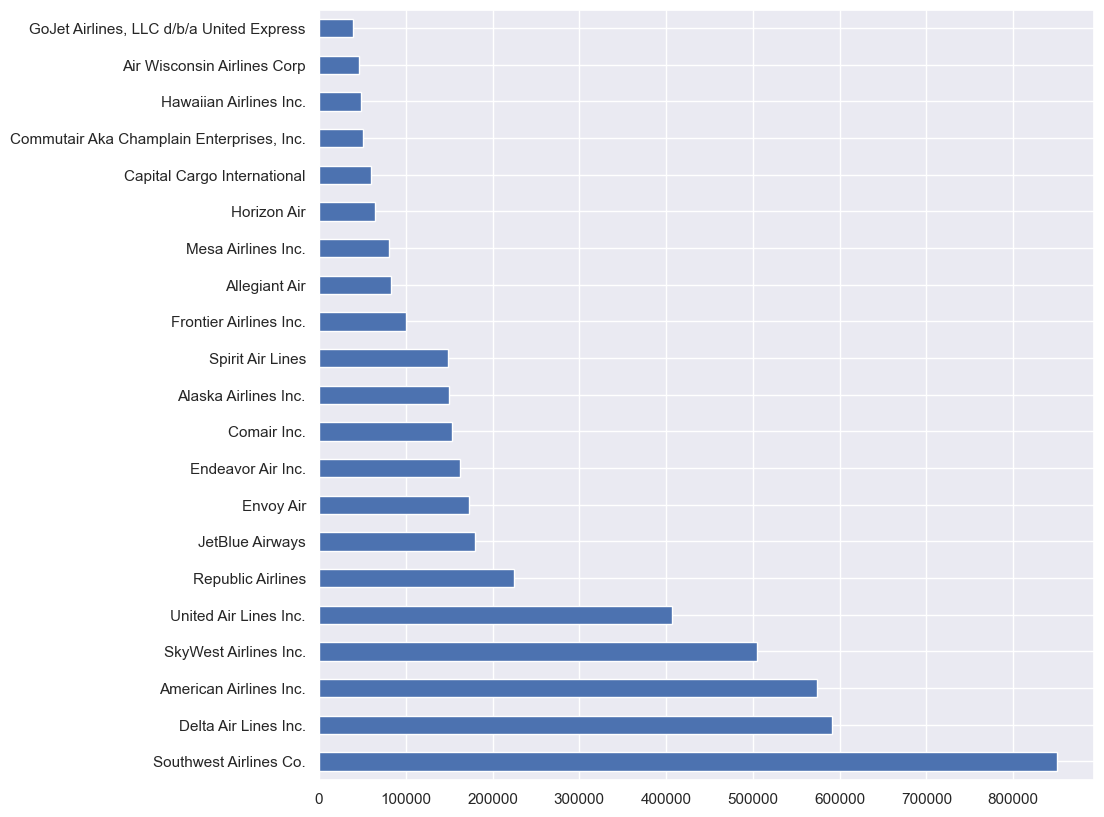

In [65]:
airline_counts.plot(kind='barh', figsize=(10, 10))


<AxesSubplot: >

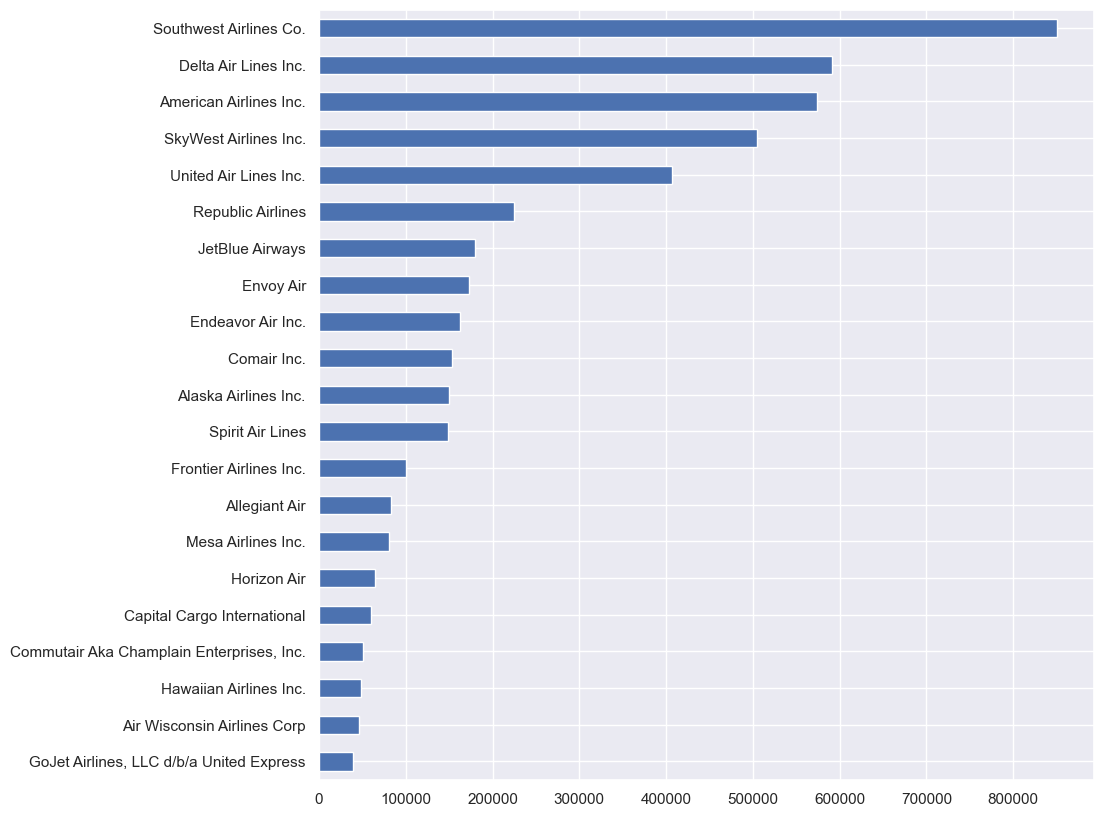

In [66]:
airline_counts.sort_values(ascending=True).plot(kind='barh', figsize=(10,10))

In [67]:
airline_counts.sort_values(ascending=True).to_frame("Row Count")

,Row Count
"GoJet Airlines, LLC d/b/a United Express",39310
Air Wisconsin Airlines Corp,45652
Hawaiian Airlines Inc.,48726
"Commutair Aka Champlain Enterprises, Inc.",51198
Capital Cargo International,59966
Horizon Air,64566
Mesa Airlines Inc.,80859
Allegiant Air,82786
Frontier Airlines Inc.,99894
Spirit Air Lines,148789


In [68]:
px.bar(
    airline_counts.sort_values(ascending=True), 
    orientation='h', 
    template="plotly_dark",
    title="Flights per airline",
    height=700,
    )

### Cancelled flights, group by Year

In [69]:
pct_cancelled = df_flights_2022["Cancelled"].mean()
print(f"{pct_cancelled:0.2f}% of flights are cancelled")
pct_cancelled

0.03% of flights are cancelled


0.029555834471981582

In [70]:
df_flights_2022["Cancelled"].value_counts()

False    4553292
True      138675
Name: Cancelled, dtype: int64

In [71]:
#df_flights.query("Year==2022").query("Cancelled")
df_flights_2022.groupby("FlightDate")["Cancelled"].agg("mean").to_frame()

,Cancelled
FlightDate,
2022-01-01,0.153500
2022-01-02,0.129504
2022-01-03,0.158931
2022-01-04,0.080606
2022-01-05,0.094092
2022-01-06,0.110386
2022-01-07,0.126592
2022-01-08,0.072110
2022-01-09,0.062467


In [72]:
# flights in 2022
df_flights_2022.query("'2022-01-01' <FlightDate < '2022-06-30'")

,FlightDate,Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,Origin,OriginCityName,OriginState,DestAirportID,Dest,DestCityName,DestState,DestStateName,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime
0,2022-01-06,Delta Air Lines Inc.,N315DN,1581,11697,FLL,"Fort Lauderdale, FL",FL,12953,LGA,"New York, NY",NY,New York,1126,0.0,0.0,0.0,0.0,0.0,1100-1159,0.0,0.0,0.0,0.0,1419,0.0,0.0,0.0,0.0,0.0,1400-1459,True,A,False,173.0,0.0,0.0,1.0,1076.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-01-06,Delta Air Lines Inc.,N545US,1582,10397,ATL,"Atlanta, GA",GA,11697,FLL,"Fort Lauderdale, FL",FL,Florida,1631,1627.0,-4.0,0.0,0.0,-1.0,1600-1659,15.0,1642.0,1815.0,5.0,1821,1820.0,-1.0,0.0,0.0,-1.0,1800-1859,False,none,False,110.0,113.0,93.0,1.0,581.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-01-06,Delta Air Lines Inc.,N545US,1582,11697,FLL,"Fort Lauderdale, FL",FL,10397,ATL,"Atlanta, GA",GA,Georgia,1931,1929.0,-2.0,0.0,0.0,-1.0,1900-1959,13.0,1942.0,2104.0,10.0,2127,2116.0,-12.0,0.0,0.0,-1.0,2100-2159,False,none,False,116.0,106.0,83.0,1.0,581.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-01-06,Delta Air Lines Inc.,N345NB,1583,11697,FLL,"Fort Lauderdale, FL",FL,14492,RDU,"Raleigh/Durham, NC",NC,North Carolina,1024,1019.0,-5.0,0.0,0.0,-1.0,1000-1059,17.0,1036.0,1209.0,3.0,1227,1212.0,-15.0,0.0,0.0,-1.0,1200-1259,False,none,False,123.0,113.0,93.0,1.0,680.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-01-06,Delta Air Lines Inc.,N978AT,1584,10397,ATL,"Atlanta, GA",GA,12448,JAN,"Jackson/Vicksburg, MS",MS,Mississippi,1117,1113.0,-4.0,0.0,0.0,-1.0,1100-1159,14.0,1127.0,1127.0,4.0,1142,1131.0,-11.0,0.0,0.0,-1.0,1100-1159,False,none,False,85.0,78.0,60.0,1.0,341.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2022-01-06,Delta Air Lines Inc.,N978AT,1584,12448,JAN,"Jackson/Vicksburg, MS",MS,10397,ATL,"Atlanta, GA",GA,Georgia,1237,1230.0,-7.0,0.0,0.0,-1.0,1200-1259,11.0,1241.0,1430.0,5.0,1458,1435.0,-23.0,0.0,0.0,-2.0,1400-1459,False,none,False,81.0,65.0,49.0,1.0,341.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2022-01-06,Delta Air Lines Inc.,N878DN,1585,14524,RIC,"Richmond, VA",VA,10397,ATL,"Atlanta, GA",GA,Georgia,900,857.0,-3.0,0.0,0.0,-1.0,0900-0959,13.0,910.0,1030.0,8.0,1050,1038.0,-12.0,0.0,0.0,-1.0,1000-1059,False,none,False,110.0,101.0,80.0,1.0,481.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2022-01-06,Delta Air Lines Inc.,N596NW,1586,13487,MSP,"Minneapolis, MN",MN,14635,RSW,"Fort Myers, FL",FL,Florida,1000,1018.0,18.0,18.0,1.0,1.0,1000-1059,15.0,1033.0,1431.0,4.0,1433,1435.0,2.0,2.0,0.0,0.0,1400-1459,False,none,False,213.0,197.0,178.0,1.0,1416.0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2022-01-06,Delta Air Lines Inc.,N872DN,1587,10397,ATL,"Atlanta, GA",GA,14492,RDU,"Raleigh/Durham, NC",NC,North Carolina,1414,1422.0,8.0,8.0,0.0,0.0,1400-1459,11.0,1433.0,1528.0,3.0,1533,1531.0,-2.0,0.0,0.0,-1.0,1500-1559,False,none,False,79.0,69.0,55.0,1.0,356.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2022-01-06,Delta Air Lines Inc.,N872DN,1587,14492,RDU,"Raleigh/Durham, NC",NC,10397,ATL,"Atlanta, GA",GA,Georgia,1643,1640.0,-3.0,0.0,0.0,-1.0,1600-1659,12.0,1652.0,1759.0,4.0,1814,1803.0,-11.0,0.0,0.0,-1.0,1800-1859,False,none,False,91.0,83.0,67.0,1.0,356.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
cancelled_flights_analysis = (
    (df_flights_2022.query("'2022-01-01' < FlightDate < '2022-12-31'")
     .groupby(["Operating_Airline", "Cancelled"])['Cancelled']
     .size()
     .unstack()
     .reset_index()
     )
    .rename(columns={False: "Departed", True: "Cancelled"})
    .rename_axis(None, axis=1))

cancelled_flights_analysis["Total"] = cancelled_flights_analysis["Departed"] + \
    cancelled_flights_analysis["Cancelled"]
cancelled_flights_analysis["Pct_Cancelled"] = (
    cancelled_flights_analysis["Cancelled"] / cancelled_flights_analysis["Total"])*100


In [74]:
cancelled_flights_analysis.head()     ## TODO: add geographical information of flight, weather information

,Operating_Airline,Departed,Cancelled,Total,Pct_Cancelled
0,Endeavor Air Inc.,155244,6797,162041,4.194617
1,American Airlines Inc.,550460,21874,572334,3.821894
2,Alaska Airlines Inc.,145717,3801,149518,2.542169
3,JetBlue Airways,171119,8075,179194,4.506289
4,"Commutair Aka Champlain Enterprises, Inc.",49359,1612,50971,3.162583


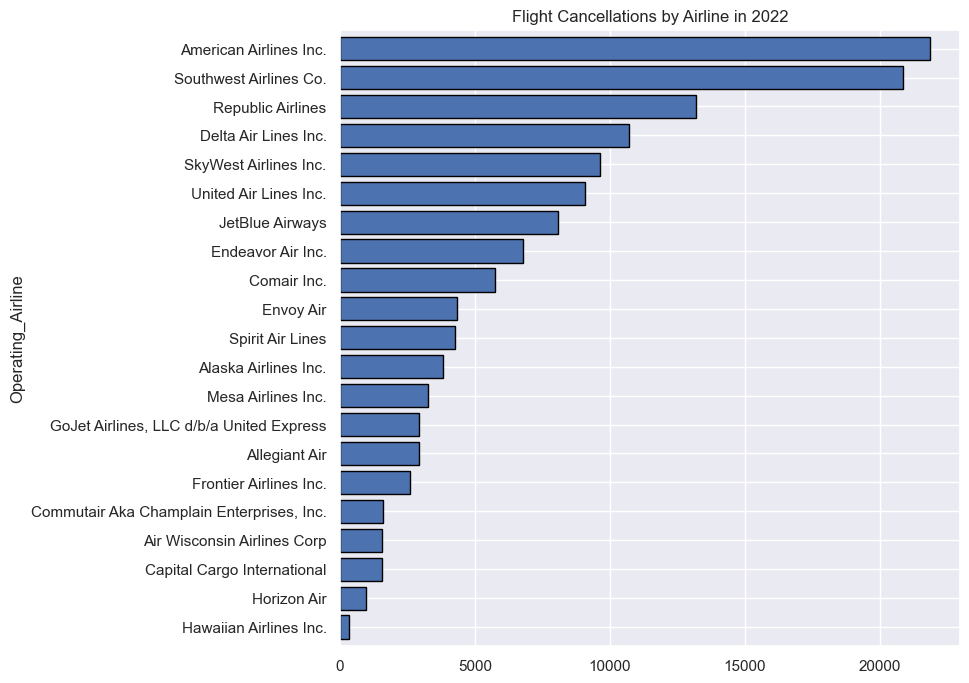

In [75]:
(cancelled_flights_analysis
 .set_index("Operating_Airline")
 .sort_values("Cancelled")["Cancelled"]
 .plot(kind="barh",
       figsize=(8, 8),
       width=.8,
       edgecolor="black",
       title="Flight Cancellations by Airline in 2022"))
plt.show()


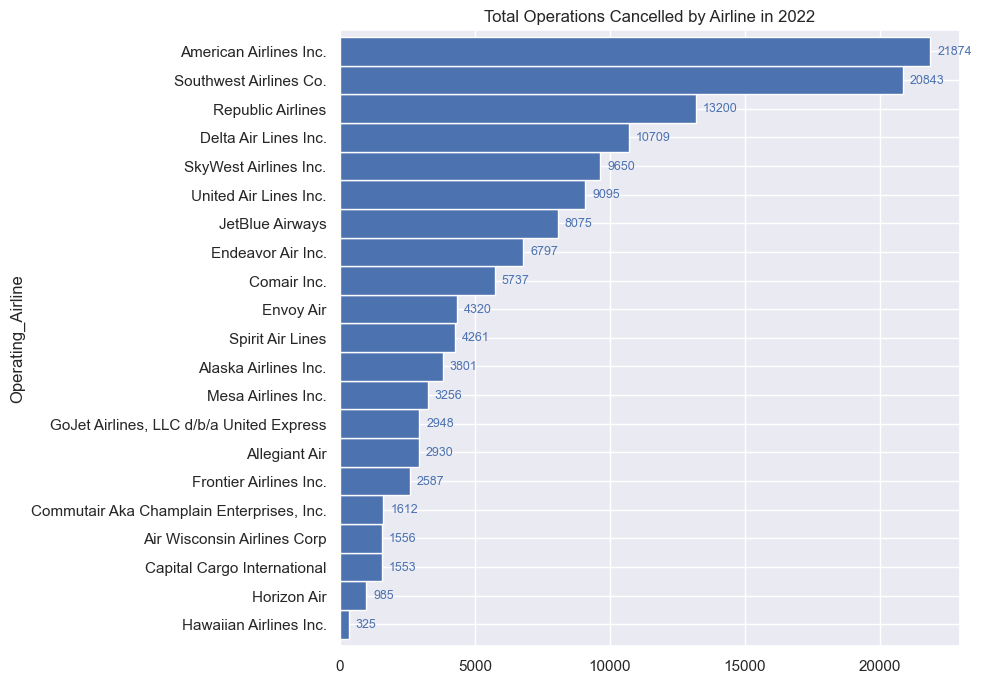

In [76]:
fig, ax = plt.subplots(figsize=(8, 8))
(cancelled_flights_analysis.set_index("Operating_Airline")
 .sort_values("Cancelled")["Cancelled"]
 .plot(kind="barh",
       title="Total Operations Cancelled by Airline in 2022",
       width=1
       ))

ax.bar_label(ax.containers[0], padding=5, fontsize=9, color='b')
plt.show()


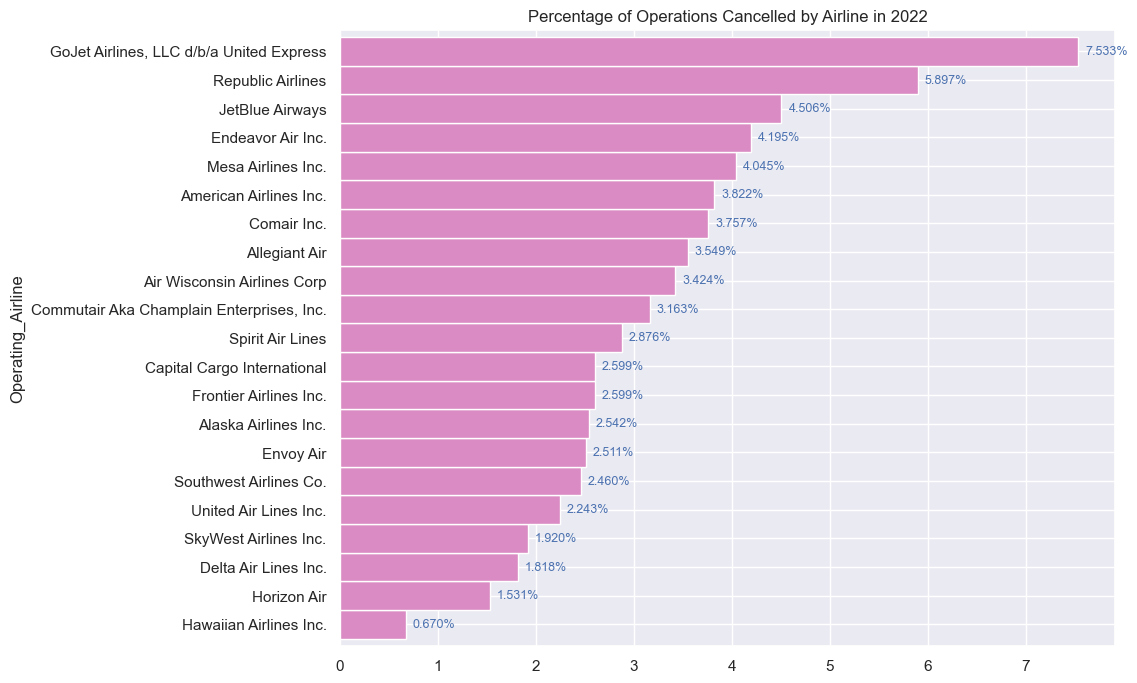

In [77]:
fig, ax = plt.subplots(figsize=(10, 8))
(cancelled_flights_analysis
 .set_index("Operating_Airline")
 .sort_values("Pct_Cancelled")["Pct_Cancelled"]
 .plot(kind="barh",
       title="Percentage of Operations Cancelled by Airline in 2022",
       width=1,
       # edgecolor="black",
       color=current_palette[6]
       ))
ax.bar_label(ax.containers[0], fmt='%.3f%%', padding=5, fontsize=9, color='b')
plt.show()


In [78]:
df_flights_2022[["FlightDate"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4691967 entries, 0 to 4691966
Data columns (total 1 columns):
 #   Column      Dtype         
---  ------      -----         
 0   FlightDate  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 35.8 MB


In [79]:
cancelled_flights = df_flights_2022.query("'2022-01-01' < FlightDate < '2022-12-31'")
cancelled_flights

,FlightDate,Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,Origin,OriginCityName,OriginState,DestAirportID,Dest,DestCityName,DestState,DestStateName,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime
0,2022-01-06,Delta Air Lines Inc.,N315DN,1581,11697,FLL,"Fort Lauderdale, FL",FL,12953,LGA,"New York, NY",NY,New York,1126,0.0,0.0,0.0,0.0,0.0,1100-1159,0.0,0.0,0.0,0.0,1419,0.0,0.0,0.0,0.0,0.0,1400-1459,True,A,False,173.0,0.0,0.0,1.0,1076.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-01-06,Delta Air Lines Inc.,N545US,1582,10397,ATL,"Atlanta, GA",GA,11697,FLL,"Fort Lauderdale, FL",FL,Florida,1631,1627.0,-4.0,0.0,0.0,-1.0,1600-1659,15.0,1642.0,1815.0,5.0,1821,1820.0,-1.0,0.0,0.0,-1.0,1800-1859,False,none,False,110.0,113.0,93.0,1.0,581.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-01-06,Delta Air Lines Inc.,N545US,1582,11697,FLL,"Fort Lauderdale, FL",FL,10397,ATL,"Atlanta, GA",GA,Georgia,1931,1929.0,-2.0,0.0,0.0,-1.0,1900-1959,13.0,1942.0,2104.0,10.0,2127,2116.0,-12.0,0.0,0.0,-1.0,2100-2159,False,none,False,116.0,106.0,83.0,1.0,581.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-01-06,Delta Air Lines Inc.,N345NB,1583,11697,FLL,"Fort Lauderdale, FL",FL,14492,RDU,"Raleigh/Durham, NC",NC,North Carolina,1024,1019.0,-5.0,0.0,0.0,-1.0,1000-1059,17.0,1036.0,1209.0,3.0,1227,1212.0,-15.0,0.0,0.0,-1.0,1200-1259,False,none,False,123.0,113.0,93.0,1.0,680.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-01-06,Delta Air Lines Inc.,N978AT,1584,10397,ATL,"Atlanta, GA",GA,12448,JAN,"Jackson/Vicksburg, MS",MS,Mississippi,1117,1113.0,-4.0,0.0,0.0,-1.0,1100-1159,14.0,1127.0,1127.0,4.0,1142,1131.0,-11.0,0.0,0.0,-1.0,1100-1159,False,none,False,85.0,78.0,60.0,1.0,341.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2022-01-06,Delta Air Lines Inc.,N978AT,1584,12448,JAN,"Jackson/Vicksburg, MS",MS,10397,ATL,"Atlanta, GA",GA,Georgia,1237,1230.0,-7.0,0.0,0.0,-1.0,1200-1259,11.0,1241.0,1430.0,5.0,1458,1435.0,-23.0,0.0,0.0,-2.0,1400-1459,False,none,False,81.0,65.0,49.0,1.0,341.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2022-01-06,Delta Air Lines Inc.,N878DN,1585,14524,RIC,"Richmond, VA",VA,10397,ATL,"Atlanta, GA",GA,Georgia,900,857.0,-3.0,0.0,0.0,-1.0,0900-0959,13.0,910.0,1030.0,8.0,1050,1038.0,-12.0,0.0,0.0,-1.0,1000-1059,False,none,False,110.0,101.0,80.0,1.0,481.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2022-01-06,Delta Air Lines Inc.,N596NW,1586,13487,MSP,"Minneapolis, MN",MN,14635,RSW,"Fort Myers, FL",FL,Florida,1000,1018.0,18.0,18.0,1.0,1.0,1000-1059,15.0,1033.0,1431.0,4.0,1433,1435.0,2.0,2.0,0.0,0.0,1400-1459,False,none,False,213.0,197.0,178.0,1.0,1416.0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2022-01-06,Delta Air Lines Inc.,N872DN,1587,10397,ATL,"Atlanta, GA",GA,14492,RDU,"Raleigh/Durham, NC",NC,North Carolina,1414,1422.0,8.0,8.0,0.0,0.0,1400-1459,11.0,1433.0,1528.0,3.0,1533,1531.0,-2.0,0.0,0.0,-1.0,1500-1559,False,none,False,79.0,69.0,55.0,1.0,356.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2022-01-06,Delta Air Lines Inc.,N872DN,1587,14492,RDU,"Raleigh/Durham, NC",NC,10397,ATL,"Atlanta, GA",GA,Georgia,1643,1640.0,-3.0,0.0,0.0,-1.0,1600-1659,12.0,1652.0,1759.0,4.0,1814,1803.0,-11.0,0.0,0.0,-1.0,1800-1859,False,none,False,91.0,83.0,67.0,1.0,356.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
cancelled_flights_count = (df_flights_2022.query("'2022-01-01' < FlightDate < '2022-12-31'").query("Cancelled")["Operating_Airline"].value_counts())
cancelled_flights_count

American Airlines Inc.                       21874
Southwest Airlines Co.                       20843
Republic Airlines                            13200
Delta Air Lines Inc.                         10709
SkyWest Airlines Inc.                         9650
United Air Lines Inc.                         9095
JetBlue Airways                               8075
Endeavor Air Inc.                             6797
Comair Inc.                                   5737
Envoy Air                                     4320
Spirit Air Lines                              4261
Alaska Airlines Inc.                          3801
Mesa Airlines Inc.                            3256
GoJet Airlines, LLC d/b/a United Express      2948
Allegiant Air                                 2930
Frontier Airlines Inc.                        2587
Commutair Aka Champlain Enterprises, Inc.     1612
Air Wisconsin Airlines Corp                   1556
Capital Cargo International                   1553
Horizon Air                    

In [81]:
current_palette

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

Analysis for January - June 2022

In [82]:
df_flights_2022["FlightDate"].dt.month.value_counts()

7    618790
8    613649
5    602950
6    602057
3    590542
4    580290
1    563737
2    519952
Name: FlightDate, dtype: int64

In [83]:
df_flights_2022["FlightDate"].dt.quarter.value_counts()

2    1785297
1    1674231
3    1232439
Name: FlightDate, dtype: int64

In [84]:
df_flights_2022["FlightDate"].value_counts()

2022-07-21    20844
2022-07-15    20843
2022-07-28    20841
2022-06-17    20841
2022-07-14    20840
2022-07-29    20833
2022-06-23    20832
2022-07-22    20820
2022-07-11    20808
2022-07-18    20803
              ...  
2022-02-26    16798
2022-03-05    16747
2022-01-01    16684
2022-02-19    16541
2022-01-08    16031
2022-02-12    15975
2022-02-05    15946
2022-01-29    15644
2022-01-22    15625
2022-01-15    15483
Name: FlightDate, Length: 243, dtype: int64

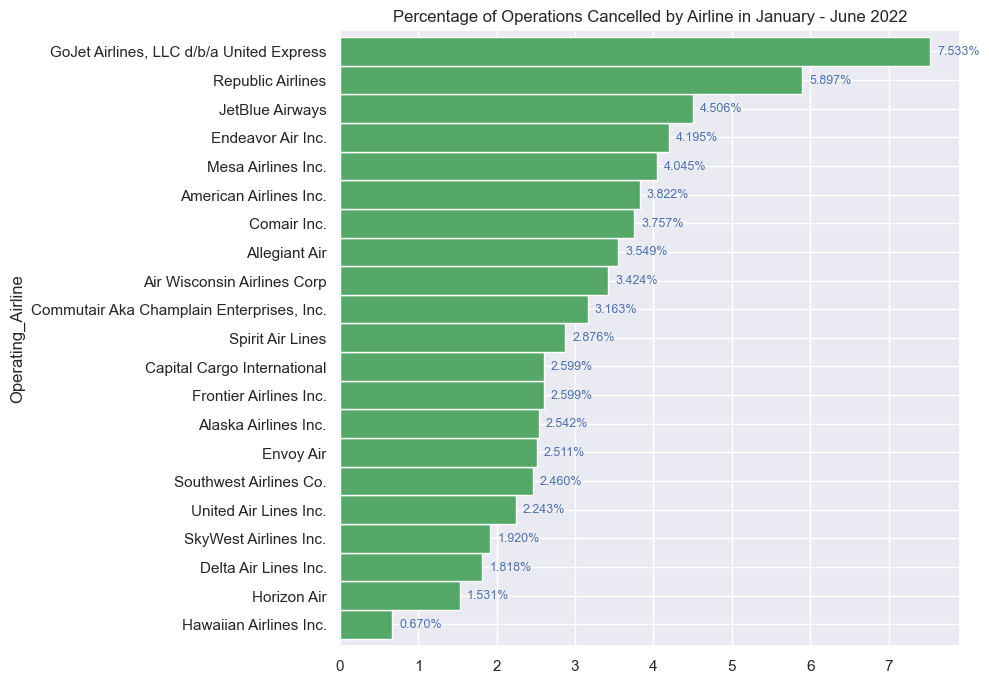

In [85]:
cancelled_flights_analysis = (
    (df_flights_2022.query("'2022-01-01' < FlightDate < '2022-12-31'")
     .groupby(["Operating_Airline", "Cancelled"])['Cancelled']
     .size()
     .unstack()
     .reset_index()
     )
    .rename(columns={False: "Departed", True: "Cancelled"})
    .rename_axis(None, axis=1))

cancelled_flights_analysis["Total"] = cancelled_flights_analysis["Departed"] + cancelled_flights_analysis["Cancelled"]
cancelled_flights_analysis["Pct_Cancelled"] = (cancelled_flights_analysis["Cancelled"] / cancelled_flights_analysis["Total"])*100

fig, ax = plt.subplots(figsize=(8, 8))
cancelled_flights_analysis.set_index("Operating_Airline").sort_values(
    "Pct_Cancelled")["Pct_Cancelled"].plot(kind="barh",
                                           title="Percentage of Operations Cancelled by Airline in January - June 2022",
                                           width=1,
                                           #edgecolor="black",
                                           color=current_palette[2]
                                           )
ax.bar_label(ax.containers[0], fmt='%.3f%%', padding=5, fontsize=9, color='b')
plt.show()

In [86]:
df_flights_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4691967 entries, 0 to 4691966
Data columns (total 48 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   FlightDate                       datetime64[ns]
 1   Operating_Airline                category      
 2   Tail_Number                      category      
 3   Flight_Number_Operating_Airline  int16         
 4   OriginAirportID                  int16         
 5   Origin                           category      
 6   OriginCityName                   category      
 7   OriginState                      category      
 8   DestAirportID                    int16         
 9   Dest                             category      
 10  DestCityName                     category      
 11  DestState                        category      
 12  DestStateName                    category      
 13  CRSDepTime                       int16         
 14  DepTime                          f

In [87]:
df_flights_2022.memory_usage(deep=True)

Index                                   128
FlightDate                         37535736
Operating_Airline                   4694152
Tail_Number                         9889900
Flight_Number_Operating_Airline     9383934
OriginAirportID                     9383934
Origin                              9414730
OriginCityName                      9418365
OriginState                         4697198
DestAirportID                       9383934
Dest                                9414730
DestCityName                        9418365
DestState                           4697198
DestStateName                       4697590
CRSDepTime                          9383934
DepTime                             9383934
DepDelay                            9383934
DepDelayMinutes                     9383934
DepDel15                            9383934
DepartureDelayGroups                9383934
DepTimeBlk                          4693777
TaxiOut                             9383934
WheelsOff                       

In [88]:
df_flights_2022.memory_usage(deep=True).sum()

437011834

In [89]:
df_flights_2022.head()

,FlightDate,Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,Origin,OriginCityName,OriginState,DestAirportID,Dest,DestCityName,DestState,DestStateName,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime
0,2022-01-06,Delta Air Lines Inc.,N315DN,1581,11697,FLL,"Fort Lauderdale, FL",FL,12953,LGA,"New York, NY",NY,New York,1126,0.0,0.0,0.0,0.0,0.0,1100-1159,0.0,0.0,0.0,0.0,1419,0.0,0.0,0.0,0.0,0.0,1400-1459,True,A,False,173.0,0.0,0.0,1.0,1076.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-01-06,Delta Air Lines Inc.,N545US,1582,10397,ATL,"Atlanta, GA",GA,11697,FLL,"Fort Lauderdale, FL",FL,Florida,1631,1627.0,-4.0,0.0,0.0,-1.0,1600-1659,15.0,1642.0,1815.0,5.0,1821,1820.0,-1.0,0.0,0.0,-1.0,1800-1859,False,none,False,110.0,113.0,93.0,1.0,581.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-01-06,Delta Air Lines Inc.,N545US,1582,11697,FLL,"Fort Lauderdale, FL",FL,10397,ATL,"Atlanta, GA",GA,Georgia,1931,1929.0,-2.0,0.0,0.0,-1.0,1900-1959,13.0,1942.0,2104.0,10.0,2127,2116.0,-12.0,0.0,0.0,-1.0,2100-2159,False,none,False,116.0,106.0,83.0,1.0,581.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-01-06,Delta Air Lines Inc.,N345NB,1583,11697,FLL,"Fort Lauderdale, FL",FL,14492,RDU,"Raleigh/Durham, NC",NC,North Carolina,1024,1019.0,-5.0,0.0,0.0,-1.0,1000-1059,17.0,1036.0,1209.0,3.0,1227,1212.0,-15.0,0.0,0.0,-1.0,1200-1259,False,none,False,123.0,113.0,93.0,1.0,680.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-01-06,Delta Air Lines Inc.,N978AT,1584,10397,ATL,"Atlanta, GA",GA,12448,JAN,"Jackson/Vicksburg, MS",MS,Mississippi,1117,1113.0,-4.0,0.0,0.0,-1.0,1100-1159,14.0,1127.0,1127.0,4.0,1142,1131.0,-11.0,0.0,0.0,-1.0,1100-1159,False,none,False,85.0,78.0,60.0,1.0,341.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
